# Experiment Details

## Submitted By
Desh Iyer, 500081889, Year III, AI/ML(H), B5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline


/home/volt/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [4]:
covariance_matrix = np.cov(df_scaled.T)

In [6]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)

In [7]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

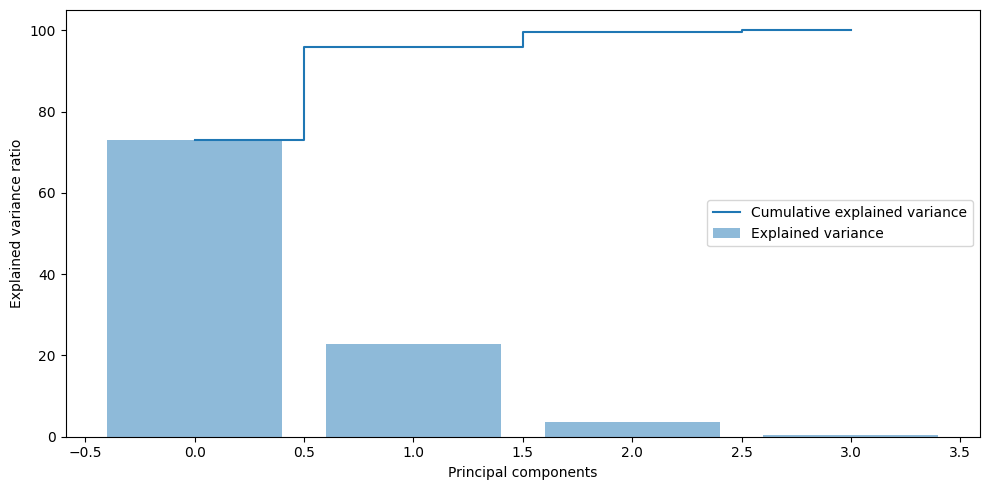

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center', label='Explained variance')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

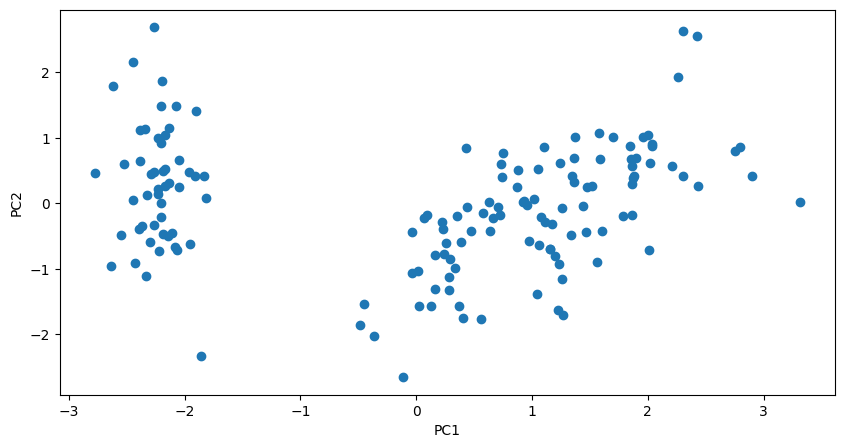

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(df_pca[:,0], df_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()